# UTP PPM 2024
---------------
# KNN

Tuliskan Nama, NIM, dan kelas Anda:

Nama  : Gede Indra Adi Brata

NIM   : 225150200111006

Kelas : PPM F

# Import Dependencies

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Dataset

Dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data

Link alternatif: https://drive.google.com/file/d/1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV/view

In [177]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV' -O winequality-red.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.
'id' is not recognized as an internal or external command,
operable program or batch file.


In [178]:
data = pd.read_csv('Indra Brata - winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [179]:
# Data information and check for missing values
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Tidak ada nilai yang hilang dalam dataset, sehingga tidak perlu dilakukan imputasi atau metode penanganan nilai yang hilang lainnya.

# Pre-proses Data

Lakukan reduksi data melalui downsampling untuk memperpendek proses pelatihan dan pengujian model.

In [180]:
# Reduce the number data
def random_sampling(df, sample_size):
    return df.sample(n=sample_size, random_state=0)
reduced_data = random_sampling(data, 500)

Lakukan normalisasi data kecuali kolom quality sebagai kolom label dengan menggunakan z-score.

In [181]:
# Z-score normalization except for the quality column
def z_score(data):

    columns_to_normalize = data.columns[:-1]

    normalized_data = data.copy()
    normalized_data[columns_to_normalize] = (data[columns_to_normalize] - data[columns_to_normalize].mean()) / data[columns_to_normalize].std()
    return normalized_data

normalized_data = z_score(reduced_data)
normalized_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,1.478894,-0.316620,0.839736,-0.342617,2.080887,1.247433,0.721623,0.787516,-0.949976,0.669567,0.326500,6
1032,-0.090687,1.829335,-1.382061,1.340176,0.200821,-1.034963,-1.029072,0.968922,0.280060,-0.797104,-0.799686,5
1002,0.490639,-1.420254,0.323039,-0.384686,-0.590786,-0.205001,-0.591398,-0.834468,-0.367327,1.179714,1.171140,7
487,1.130098,0.756357,0.478048,-0.595036,-0.838163,-1.034963,-1.029072,0.787516,-0.949976,-1.498556,-0.424291,6
979,2.292751,-0.439246,1.149754,-0.931594,-0.293934,-1.242453,-1.298410,0.093904,-1.208930,-0.159421,-0.048895,5


# Model

Buatlah sebuah fungsi perhitungan jarak menggunakan rumus Chebyshev, Euclidean, Manhattan yang memiliki parameter data1 dan data2 dalam bentuk float, dan distance_type dalam bentuk string.

In [182]:
# Distance Function (chebyshev, euclidean, manhattan)

def chebyshev(data1, data2):
    return max(np.abs(data1 - data2))
def euclidean(data1, data2):
    return np.sqrt(np.sum((data1 - data2) ** 2))
def manhattan(data1, data2):
    return np.sum(np.abs(data1 - data2))


def calculate_distance(data1, data2, distance_type):
    if distance_type == 'chebyshev':
        return chebyshev(data1, data2)
    elif distance_type == 'euclidean':
        return euclidean(data1, data2)
    elif distance_type == 'manhattan':
        return manhattan(data1, data2)
    else:
        return None

Simpan label dataset yang dinormalisasi ke dalam variabel yang disebut "label".

In [183]:
label = normalized_data[normalized_data.columns[-1]]
label

1109    6
1032    5
1002    7
487     6
979     5
       ..
831     6
1437    5
620     5
465     5
748     6
Name: quality, Length: 500, dtype: int64

Bagi dataset yang dinormalisasi menjadi 80% untuk pelatihan dan 20% untuk pengujian.

In [184]:
train_data, test_data, train_label, test_label = train_test_split(normalized_data.iloc[:, :-1], label, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

(400, 11)
(100, 11)


Buatlah sebuah fungsi algoritma KNN untuk melakukan prediksi menggunakan parameter train_data, train_label, test_data, k sebagai bilangan bulat, dan distance_type sebagai string.

In [185]:
def knn(train_data, train_label, test_data, k, distance_type):
    distances = np.array([calculate_distance(train_data.iloc[i], test_data, distance_type) for i in range(len(train_data))])
    index_k_minumum = distances.argsort()[:k]
    k_labels = train_label.iloc[index_k_minumum].to_numpy()
    counter = Counter(k_labels)
    prediction = counter.most_common(1)[0][0]
    
    return prediction

def knn_multi(train_data, train_label, test_data, k, distance_type):
    predictions = []
    for i in range(len(test_data)):
        predictions.append(knn(train_data, train_label, test_data.iloc[i], k, distance_type))
    return  pd.DataFrame(predictions)

Temukan nilai k terbaik dengan mengamati hasil akurasi untuk setiap nilai k yang berbeda dan berbagai metode perhitungan jarak yang berbeda.

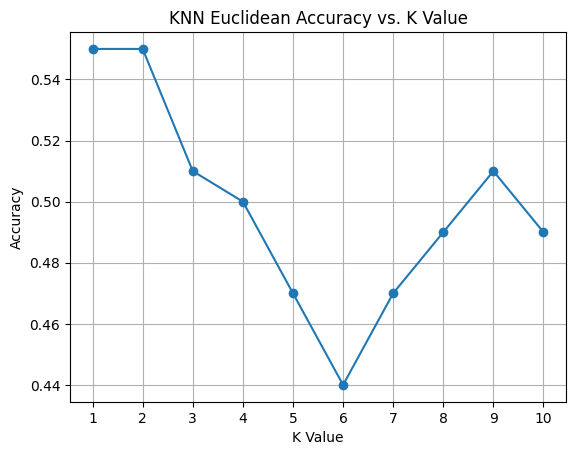

In [186]:
# Find best k for euclidean KNN

k_values = []
accuracies = []

k_range = range(1, 11) 

for k in k_range:
    predictions = knn_multi(train_data, train_label, test_data, k, 'euclidean')
    accuracy = accuracy_score(test_label, predictions)
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Euclidean Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

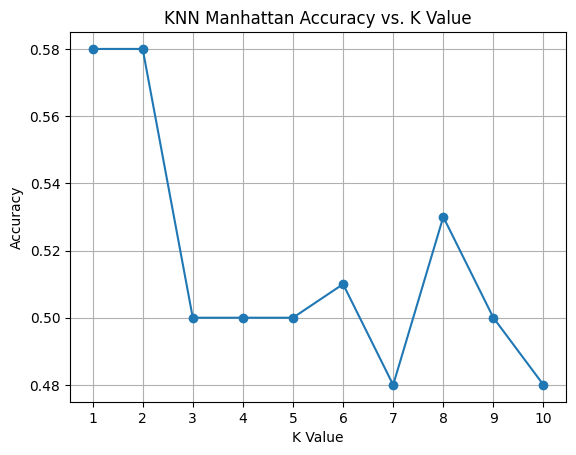

In [187]:
# Find best k for Manhattan KNN

k_values = []
accuracies = []

k_range = range(1, 11) 

for k in k_range:
    predictions = knn_multi(train_data, train_label, test_data, k, 'manhattan')
    accuracy = accuracy_score(test_label, predictions)
    k_values.append(k)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Manhattan Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

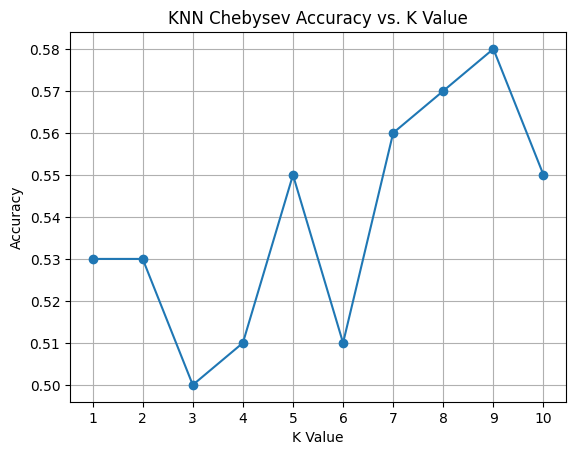

In [188]:
# Find best k for chebyshev KNN

k_values = []
accuracies = []

k_range = range(1, 11) 

for k in k_range:
    predictions = knn_multi(train_data, train_label, test_data, k, 'chebyshev')
    accuracy = accuracy_score(test_label, predictions)
    k_values.append(k)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Chebysev Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# Evaluasi

Cetak hasil akurasi prediksi untuk setiap KNN dengan nilai k terbaik dan rumus perhitungan jarak yang berbeda

In [192]:
# Predict using euclidean KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, 3, 'euclidean')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.51


In [193]:
# Predict using manhattan KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, 5, 'manhattan')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.5


In [191]:
# Predict using chebyshev KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, 9, 'chebyshev')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.58


Note : meskipun pada distance metric euclidean, dan manhattan yang menghasilkan hasil accuracy tertinggi, yaitu nilai K 1 dan 2 namun hal tersebut sebaiknya dihindari karena dapat mengakibatkan overfitting dan menyebabkan model yang dihasilkan kurang baik. Oleh karena itu saya mengganti ke nilai K yang lain namun memiliki accuracy cukup tinggi dan termasuk ke dalam bilangan ganjil. Bilangan ganjil digunakan karena dapat mengurangi ambiguitas apabila menggunakan bilangan genap dan mendapatkan jumlah kelas terdapat sama. Contoh 2 kelas A dan 2 Kelas B

# Kesimpulan

Soal

1. Jelaskan pengaruh k yang rendah ataupun tinggi terhadap akurasi hasil algoritma KNN!
2. Jelaskan pengaruh perbedaan rumus perhitungan jarak yang digunakan terhadap hasil akurasi algoritma KNN!
3. Jelaskan dan sebutkan berapa jumlah k ideal dan apa rumus perhitungan jarak yang menghasilkan akurasi terbaik pada praktikum ini!

Jawaban

1. Nilai K pada algoritma KNN merupakan hyperparameter dari algoritma ini, karena nilai K sangat mempengaruhi nilai prediksi yang dihasilkan. Oleh karena itu, diperlukan nilai K yang optimal sehingga model yang dihasilkan juga ikut optimal. Terdapat beberapa kondisi yang menyebabkan suatu model kurang akurat.
  - K rendah: ketika nilai k rendah, model cenderung lebih sensitif terhadap noise atau variasi kecil dalam data. Ini dapat menyebabkan model menjadi terlalu kompleks dan cenderung overfitting terhadap data pelatihan. Dalam kasus ini, model mungkin akan mengambil keputusan berdasarkan sedikit tetangga terdekat, yang mungkin tidak merepresentasikan distribusi yang sebenarnya dari kelas yang diberikan
  - K tinggi: ketika nilai k tinggi, model menjadi lebih stabil dan cenderung memiliki bias yang lebih rendah. Model akan membuat prediksi berdasarkan mayoritas kelas dari sejumlah besar tetangga terdekat. Ini dapat menyebabkan model menjadi terlalu sederhana dan cenderung underfitting terhadap data pelatihan.

2. Algoritma KNN merupakan algoritma yang menggunakan distance metric untuk menghitung jarak antar tentangganya, terdapat beberapa distance metric seperti euclidean, manhattan, minkowski, chebysev. Tentunya terdapat terdapat perbedaan hasil yang akan terjadi karena setiap distance metric memiliki caranya sendiri untuk melakukan perhitungan.
  - Euclidean Distance adalah metrik jarak yang paling umum digunakan dalam algoritma KNN. Ini mengukur jarak langsung antara dua titik dalam ruang Euclidean. Perbedaan dalam skala antar fitur dapat mempengaruhi perhitungan jarak, karena fitur dengan rentang nilai yang lebih besar akan memberikan kontribusi lebih besar terhadap perhitungan jarak.
  - Manhattan Distance adalah jumlah dari perbedaan absolut antara koordinat dua titik. Rumus ini lebih cocok untuk data yang tidak berdistribusi normal dan ketika perbedaan dalam rentang nilai antar fitur tidak boleh diabaikan. Ini juga lebih tahan terhadap outlier dibandingkan dengan jarak Euclidean.
  - Chebyshev Distance merupakan sebuah metrik jarak yang digunakan untuk mengukur jarak antara dua titik dalam ruang dimensi n. Metrik ini didefinisikan sebagai jarak terpanjang antara dua vektor dalam ruang dimensi n. Chebyshev Distance juga dikenal sebagai infinity norm atau maximum norm.
Berdasarkan hal tersebut, pemilihan distance metric ini harus disesuaikan dengan persebaran data ataupun distribusi data.
3. Pada praktikum ini terdapat 3 distance metric yang digunakan, yaitu euclidean, manhattan, dan chebysev. Pada praktikum ini juga dilakukan pengejuian beberapa nilai K untuk mendapatkan nilai K yang optimal.
  - Euclidean Distance : pada algoritma ini saya menggunakan nilai K 3 sebagai nilai K optimal dengana akurasi 0.51. Pada grafik memang menunjukkan K 1 dan 2 memiliki nilai akurasi tertinggi namun apabila menggunakan K tersebut akan mengakibatkan overfitting pada model yang digunakan. Oleh karena itu, saya memilih 3 (ganjil) sebagai nilai K optimal sehingga jumlah K optimal hanya 1.
  - Manhttan Distance : pada grafik terlihat bahwa nilai K 1 dan 2 menunjukkan nilai akurasi tertinggi namun sama seperti sebelumnya hal tersebut bisa mengakibatkan overfitting. Oleh karena itu saya memilih nilai K 5 sebagai nilai K yang optimal dengan akurasi 0.5. Namun sebenarnya terdapat nilai K lain yang menghasilkan akurasi 0.5, yaitu 3 dan 4 sehingga terdapat 3 nilai K yang menghasilkan nilai optimal.
  - Chebysev Distance : pada grafik ini terlihat bahwa nilai K 9 memiliki akurasi paling tinggi dengan nilai 0.58 sehingga nilai K 9 merupakan nilai K optimal dari algoritma chebysev.

Berdasarkan ketiga algoritma ini maka yang menghasilkan akurasi paling tinggi adalah Chebysev Distance dengan nilai K=9 dan akurasinya adalah 0.58